# IRIS feature extraction

## Geometrical Features

In [1]:
# Basic imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

(232, 271, 3)
(232, 271)


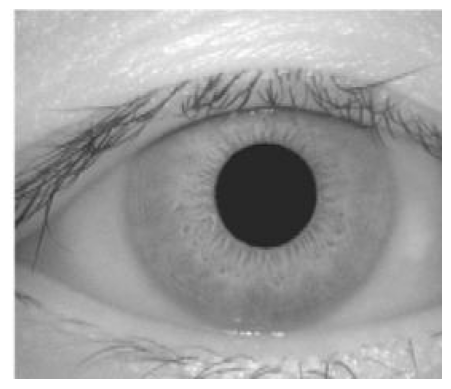

In [54]:
# Displaying eye sample
path = "eye.jpg" # change if needed
image = cv2.imread(path)
print(image.shape) # Image is read in as a numpy array 
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(img_gray.shape) # This is converted image
plt.axis('off') # turns off axis
plt.imshow(image)
plt.show()

### Trying detection of iris using conventional methods for this sample

Iris detected at (x=160, y=116) with radius=33


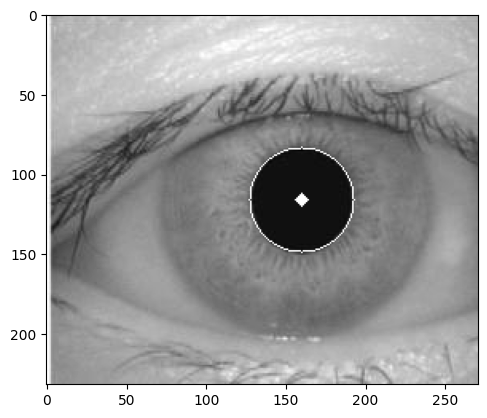

In [55]:
# Gaussian blur
blurred_image = cv2.GaussianBlur(img_gray, (9,9),2)
# Hough transform to detect iris circle
circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT,
                           dp=1,
                           minDist=50,
                           param1=100,
                           param2=30,
                           minRadius=20,
                           maxRadius=50)

if circles is not None : # meaning return val from func is not none.
    circles = np.uint16(np.around(circles))
    for circle in circles[0,:]:
        x, y, radius = circle
        cv2.circle(img_gray, (x,y), radius, (255,255,0), 1) # circle around the iris
        cv2.circle(img_gray, (x,y), 2, (255,0,255), 3) # circle marking centre
        print(f"Iris detected at (x={x}, y={y}) with radius={radius}")
plt.imshow(img_gray, cmap="gray")

In [8]:
print(circles)

[[[160 116  33]]]


True

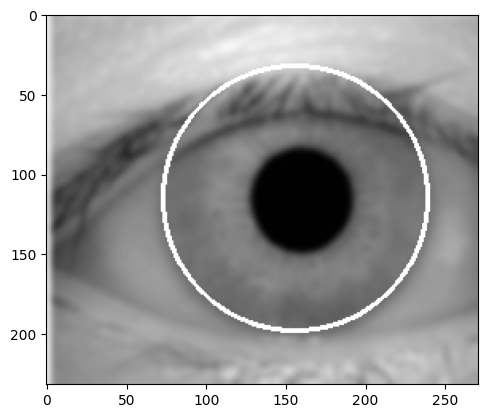

In [56]:
path = "eye.jpg" # change if needed
image = cv2.imread(path)
cv2.circle(blurred_image ,(156,115),83,(255,0,25),2)
plt.imshow(blurred_image, cmap="gray")
cv2.imwrite("/home/idiot/image_with_circs.jpg",blurred_image)

##### I tried varying the radius and x,y using ipywidgets to get a good approximation of true value of radius of iris and center. :|

### Rubber sheet model

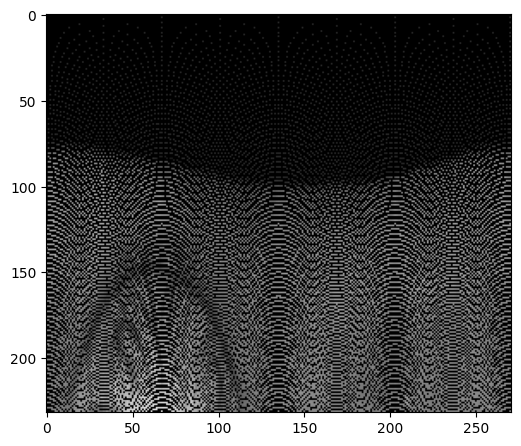

In [58]:
def rubber_sheet_transformation(image, center, radius):
    # Get the image dimensions
    height, width = image.shape[:2]
    
    # Create an empty image for the rubber sheet transformation
    rubber_sheet_image = np.zeros_like(image)

    # Extract center coordinates
    x_c, y_c = center

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Calculate the Euclidean distance (r) and angle (theta) from the center of the circle
            r = np.sqrt((x - x_c)**2 + (y - y_c)**2)
            theta = np.arctan2(y - y_c, x - x_c)
            
            # Only consider points inside the circle
            if r <= radius:
                # Normalize the radius to fit into the range [0, 1]
                normalized_r = r / radius
                
                # Map the (r, theta) to a new Cartesian coordinate in the "rubber sheet"
                new_x = int(normalized_r * height)  # Stretch r across the height
                new_y = int((theta + np.pi) / (2 * np.pi) * width)  # Map theta across the width
                
                # Ensure the new coordinates are within bounds
                new_x = min(max(new_x, 0), height - 1)
                new_y = min(max(new_y, 0), width - 1)
                
                # Copy the pixel value to the new position in the "rubber sheet"
                rubber_sheet_image[new_x, new_y] = image[y, x]

    return rubber_sheet_image

# Load the image (change the path if needed)
image = cv2.imread("eye.jpg")

# Define the center and radius of the circle
center = (156, 115)  # (x, y)
radius = 83

# Apply the rubber sheet transformation
rubber_sheet_image = rubber_sheet_transformation(image, center, radius)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(rubber_sheet_image, cv2.COLOR_BGR2RGB), cmap="gray")
plt.show()


Area of iris = 21642.0 pixels^2
Radius of iris = 522.0 pixels
Derivative of image
Derivative along X direction


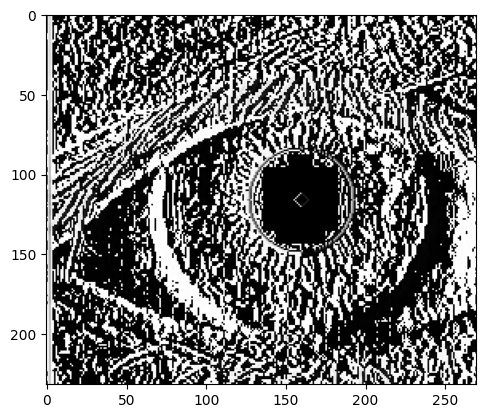

Derivative along Y direction


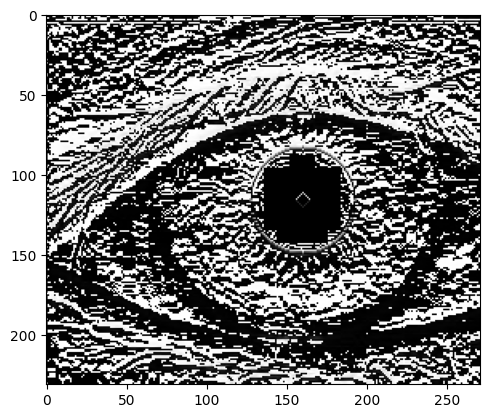

In [70]:
area = np.around(np.pi*(radius*radius))
print(f"Area of iris = {area} pixels^2")
perimeter = np.around(np.pi*(2*radius))
print(f"Radius of iris = {perimeter} pixels")

print("Derivative of image")
derivative_x = np.diff(img_gray, axis=1)
derivative_y = np.diff(img_gray, axis=0)
print("Derivative along X direction")
plt.imshow(derivative_x, cmap="gray")
plt.show()
print("Derivative along Y direction")
plt.imshow(derivative_y, cmap="gray")
plt.show()

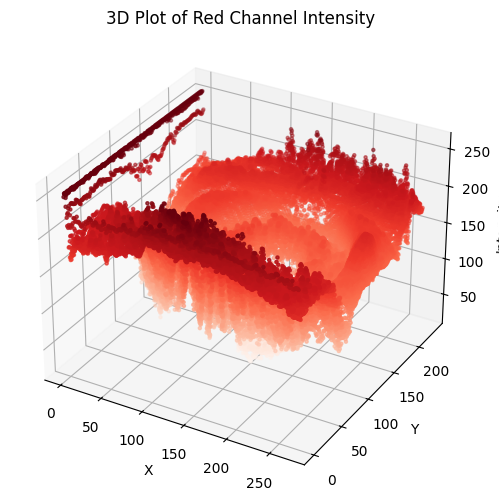

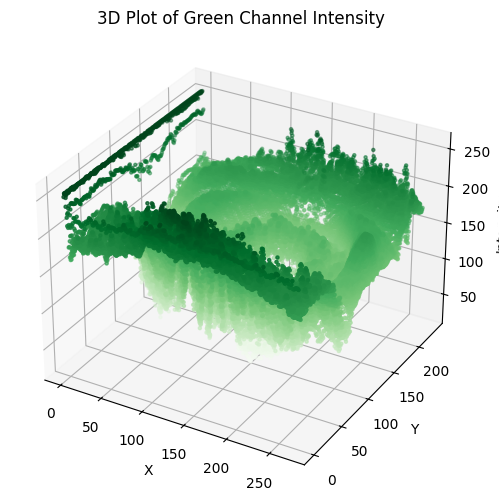

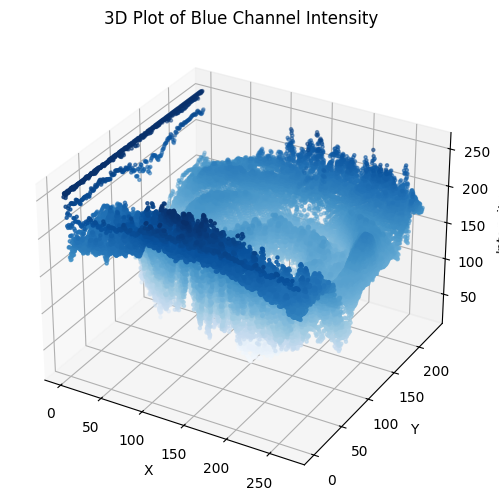

In [78]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Convert image to RGB if loaded in BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the height, width, and depth (channels)
height, width, depth = image_rgb.shape

# Create meshgrid for x and y coordinates (height, width)
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Flatten x, y, and each channel (RGB)
x = x.flatten()
y = y.flatten()
r_intensity = image_rgb[:, :, 0].flatten()  # Red channel intensity
g_intensity = image_rgb[:, :, 1].flatten()  # Green channel intensity
b_intensity = image_rgb[:, :, 2].flatten()  # Blue channel intensity

# Create 3D plot for Red Channel Intensity
fig = plt.figure(figsize=(8, 6))

# 3D scatter plot for Red Channel
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, r_intensity, c=r_intensity, cmap='Reds', marker='.', label="Red Channel")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Plot of Red Channel Intensity')

# Show the plot
plt.show()

# Create 3D plot for Green Channel Intensity
fig = plt.figure(figsize=(8, 6))

# 3D scatter plot for Green Channel
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, g_intensity, c=g_intensity, cmap='Greens', marker='.', label="Green Channel")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Plot of Green Channel Intensity')

# Show the plot
plt.show()

# Create 3D plot for Blue Channel Intensity
fig = plt.figure(figsize=(8, 6))

# 3D scatter plot for Blue Channel
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, b_intensity, c=b_intensity, cmap='Blues', marker='.', label="Blue Channel")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Plot of Blue Channel Intensity')

# Show the plot
plt.show()


## Statistical Features

In [80]:
from skimage import measure

# Load the image (grayscale or ROI)
image = cv2.imread("eye.jpg", cv2.IMREAD_GRAYSCALE)

# Compute basic statistics
mean_intensity = np.mean(image)
std_dev = np.std(image)
skewness = np.mean(((image - mean_intensity) / std_dev)**3)
kurtosis = np.mean(((image - mean_intensity) / std_dev)**4) - 3

# Compute texture features (e.g., entropy)
entropy = -np.sum((image/255.0) * np.log2(image/255.0 + 1e-10))

# Compute min, max, and range
min_intensity = np.min(image)
max_intensity = np.max(image)
range_intensity = max_intensity - min_intensity


# Output features
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Entropy: {entropy}")
print(f"Min Intensity: {min_intensity}")
print(f"Max Intensity: {max_intensity}")
print(f"Range of Intensity: {range_intensity}")


Mean Intensity: 155.920696017305
Standard Deviation: 44.09093524217516
Skewness: -0.5517151047599891
Kurtosis: 0.6526970377445012
Entropy: 24776.751293450627
Min Intensity: 25
Max Intensity: 255
Range of Intensity: 230


## Histogram based Features

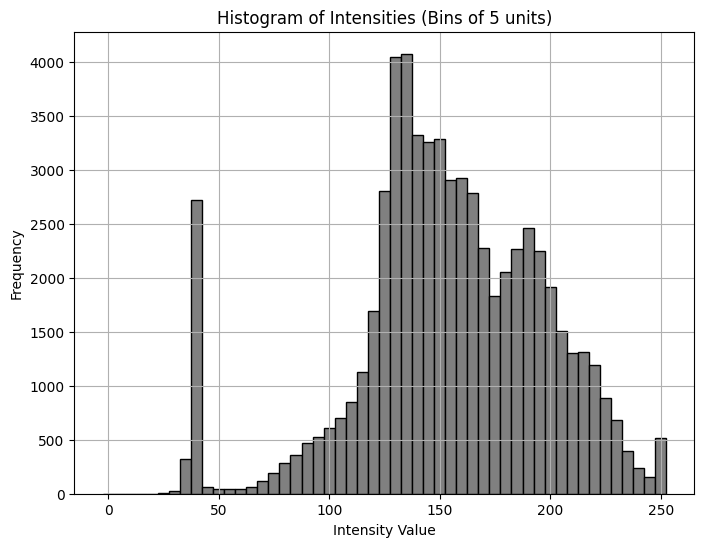

In [83]:
# Define bin edges with a step size of 5
bin_width = 5
bins = np.arange(0, 256, bin_width)

# Compute the histogram
hist, bin_edges = np.histogram(image, bins=bins)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=bin_width, color='gray', edgecolor='black')
plt.title('Histogram of Intensities (Bins of 5 units)')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

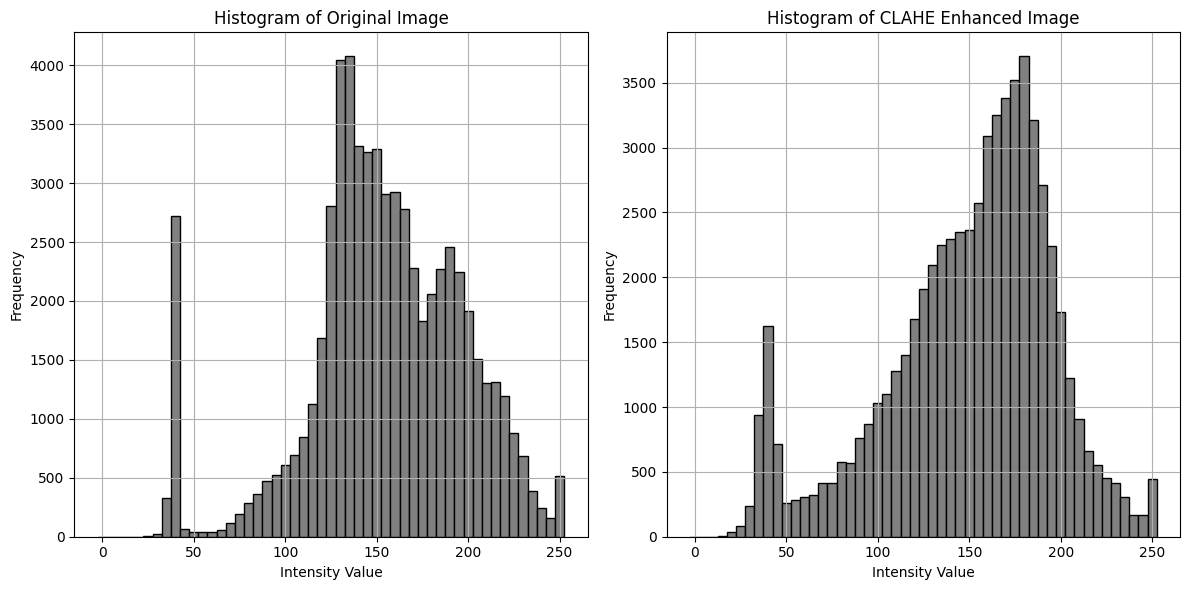

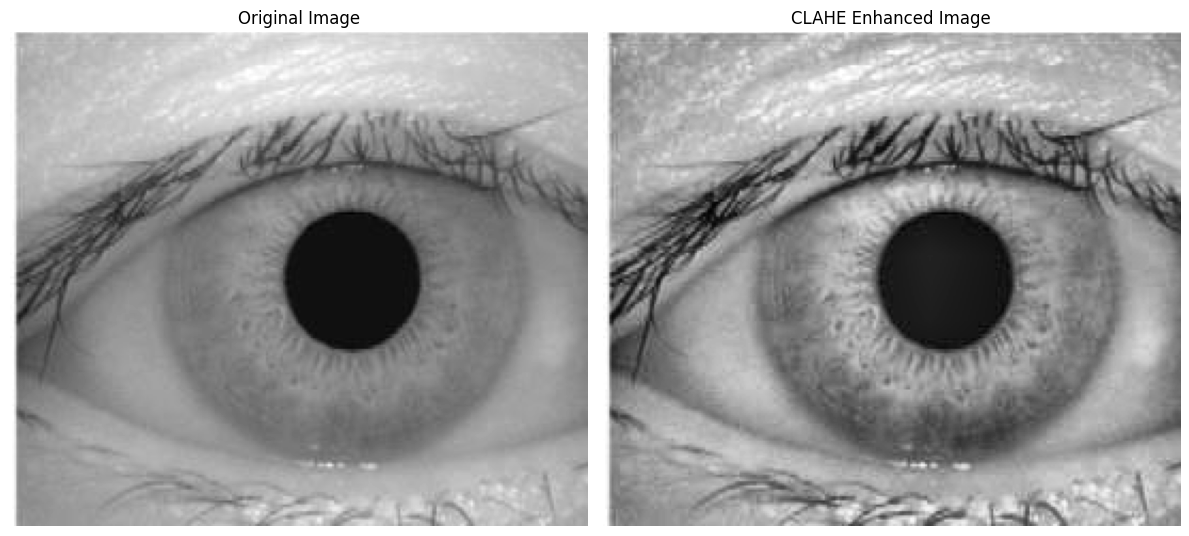

In [85]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Compute histograms for original and CLAHE images
bin_width = 5
bins = np.arange(0, 256, bin_width)

# Original image histogram
hist_original, bin_edges_original = np.histogram(image, bins=bins)

# CLAHE image histogram
hist_clahe, bin_edges_clahe = np.histogram(clahe_image, bins=bins)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot original image histogram
plt.subplot(1, 2, 1)
plt.bar(bin_edges_original[:-1], hist_original, width=bin_width, color='gray', edgecolor='black')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)

# Plot CLAHE image histogram
plt.subplot(1, 2, 2)
plt.bar(bin_edges_clahe[:-1], hist_clahe, width=bin_width, color='gray', edgecolor='black')
plt.title('Histogram of CLAHE Enhanced Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot original and CLAHE images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# CLAHE-enhanced image
plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Discrete Cosine Transform

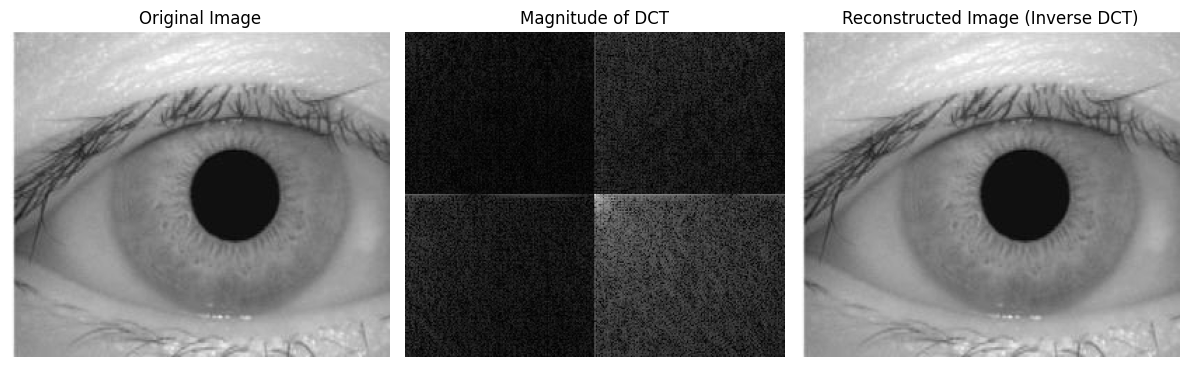

In [86]:
# Convert the image to float32 (DCT requires float input)
image_float = np.float32(image)

# Apply 2D DCT (Discrete Cosine Transform)
dct_image = cv2.dct(image_float)

# Shift the zero frequency component to the center for visualization
dct_shifted = np.fft.fftshift(dct_image)

# Compute the magnitude of the DCT coefficients (log scale for better visualization)
magnitude = np.log(np.abs(dct_shifted) + 1)  # Log to scale the values for visualization

# Apply inverse DCT to reconstruct the image
idct_image = cv2.idct(dct_image)

# Plot the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# DCT Magnitude
plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of DCT')
plt.axis('off')

# Reconstructed Image (after inverse DCT)
plt.subplot(1, 3, 3)
plt.imshow(idct_image, cmap='gray')
plt.title('Reconstructed Image (Inverse DCT)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Discrete Wavelet Transform

In [ ]:
!pip install PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01


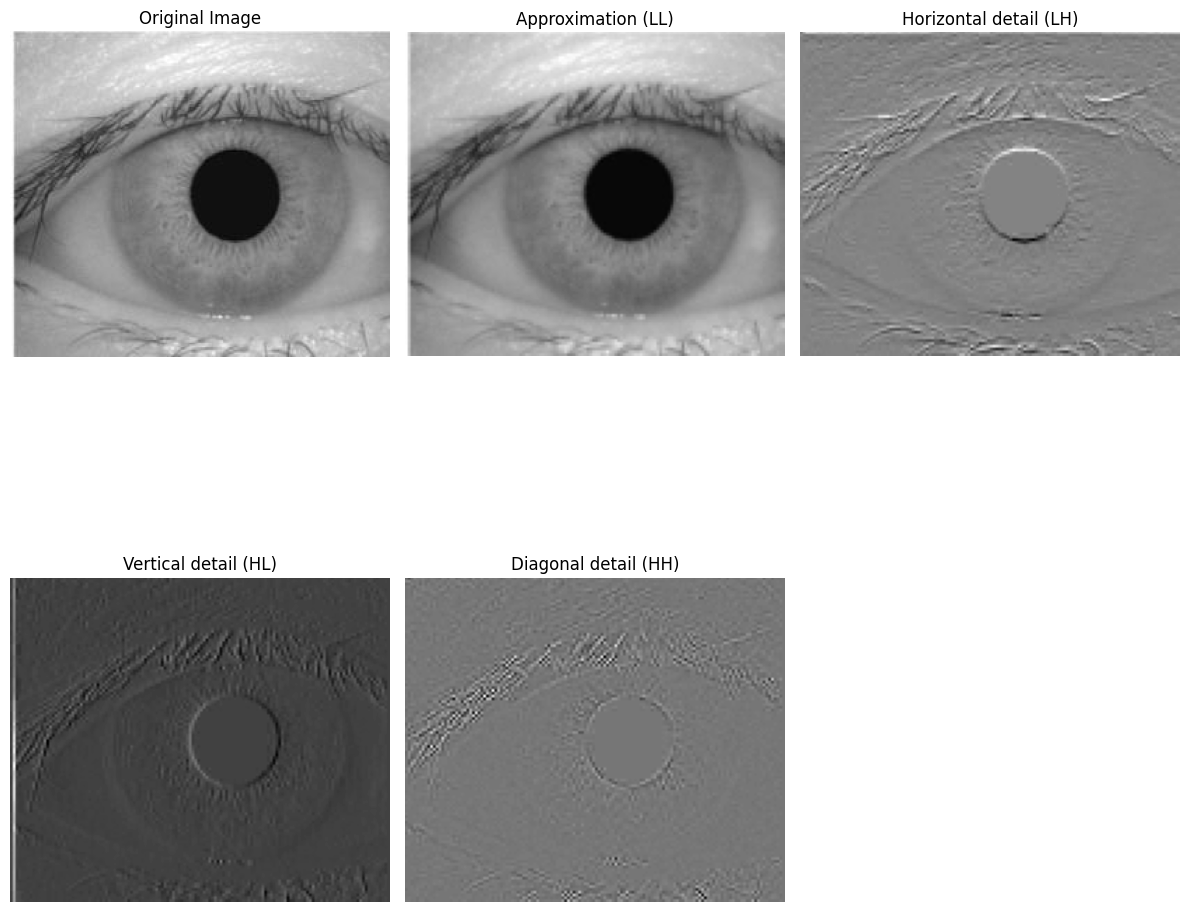

In [90]:
import pywt # for the wavelet transform
# Apply 2D Discrete Wavelet Transform (DWT) using the 'haar' wavelet
# You can also try 'db1', 'db2', 'coif1', etc., for different wavelet types.
LL, (LH, HL, HH) = pywt.dwt2(image, 'haar')

# Plotting the original image and the DWT components
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Approximation (LL)
plt.subplot(2, 3, 2)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

# Horizontal detail (LH)
plt.subplot(2, 3, 3)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal detail (LH)')
plt.axis('off')

# Vertical detail (HL)
plt.subplot(2, 3, 4)
plt.imshow(HL, cmap='gray')
plt.title('Vertical detail (HL)')
plt.axis('off')

# Diagonal detail (HH)
plt.subplot(2, 3, 5)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal detail (HH)')
plt.axis('off')

# Combine and plot the results
plt.tight_layout()
plt.show()
